In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis);

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

In [4]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=10,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )

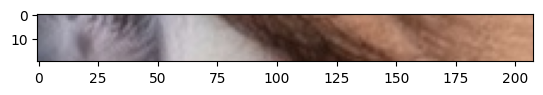

In [5]:
segment = segments[0]
plt.imshow(segment)

In [10]:
import PIL.Image as pilimg
rgb_segment = pilimg.fromarray(segment)

In [14]:
pil_image = rgb_segment.convert('RGB')
open_cv_image = np.array(pil_image)
# Convert RGB to BGR
opencv_segment = open_cv_image[:, :, ::-1].copy()

In [15]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# pixel_vals = segment.reshape((-1,3))
pixel_vals = segment[:,:,:3]
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

In [24]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.8)
k = 5 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

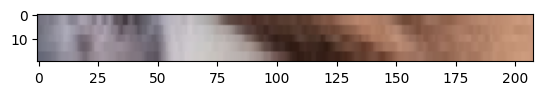

In [25]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((opencv_segment.shape)) # reshape data into the original image dimensions

# segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)